**Ames Housing Dataset: An Introduction**

The Ames Housing dataset is a work by Dean De Cock in 2011 that provides a comprehensive snapshot of the housing market in Ames, Iowa, between 2006 and 2010. With 79 explanatory variables describing various aspects of residential homes, it offers a rich dataset to explore and predict house prices.

**Key Features**:

- General Characteristics: Information about the type and style of the dwelling, its age, and specific characteristics.
- Location Information: Details about the zone, neighborhood, proximity to main roads, and more.
- Property Features: Data on lot size, shape, street access, and more.
- Home Features: Number of bedrooms, bathrooms, kitchen quality, room sizes, and more.
- Basement and Garage Details: Information about the basement's quality, finish type, size, and similar details for garages.
- Utilities: Details about utilities available, heating and cooling systems, etc.
- Quality and Condition: Ratings for the overall material and finish of the house, as well as its overall condition.
- Sale Information: Sale type, condition, and of course, the sale price.

**Objective**:

The primary goal when working with the Ames Housing dataset is to predict the sale price of houses based on the various features provided. This involves understanding the relationships between the features and the target variable, selecting the most relevant features, and building a predictive model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [2]:
ames_housing = pd.read_csv('AmesHousing.csv')
info_housing = ames_housing.info()
head_housing = ames_housing.head()

info_housing, head_housing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

(None,
    Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
 0      1  526301100           20        RL         141.0     31770   Pave   
 1      2  526350040           20        RH          80.0     11622   Pave   
 2      3  526351010           20        RL          81.0     14267   Pave   
 3      4  526353030           20        RL          93.0     11160   Pave   
 4      5  527105010           60        RL          74.0     13830   Pave   
 
   Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
 0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
 1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
 2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
 3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
 4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
 
   Misc Val Mo Sold Yr Sold Sale Type  Sale Condition

Ames Housing dataset has 2,930 entries and 82 columns. 

- The dataset comprises a mix of numerical and categorical features.
- Some columns, such as "Alley", "Pool QC", and "Fence", have a significant number of missing values.
- The target variable is "SalePrice", which is a numerical column.

In [3]:
numerical_summary = ames_housing.describe()
print(f"Numerical Summary of Ames Housing: \n{numerical_summary}")



Numerical Summary of Ames Housing: 
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111

1. Features - Lot Frontage,Mas Vnr Area - contain missing values.
2. A wide range in the year houses were built from 1872 to 2010.
3. Features like Pool Area, 3Ssn Porch, and Screen Porch have a mjaority of zeros, suggesting that many houses don't have these amenities.

In [3]:
saleprice_summary = ames_housing['SalePrice'].describe()
print(f"Summary Statistics for SalePrice: \n{saleprice_summary}")


Summary Statistics for SalePrice: 
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


Target variable, SalePrice, has a mean of approx. $180,796 with a standard deviation of around $79,886. Minimum and maximum prices are $12,789 and $755,000

c:\Users\lifet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


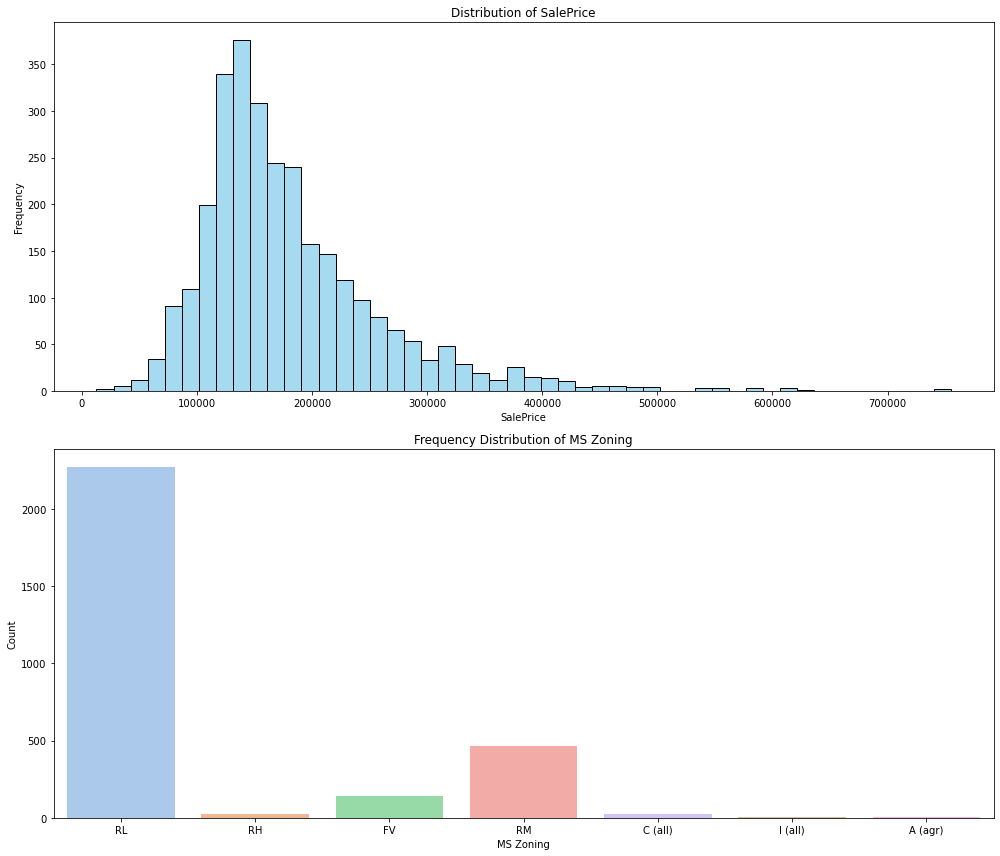

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

sns.histplot(data = ames_housing, x ='SalePrice', bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of SalePrice')
ax[0].set_xlabel('SalePrice')
ax[0].set_ylabel('Frequency')

sns.countplot(ames_housing['MS Zoning'], ax=ax[1], palette='pastel')
ax[1].set_title('Frequency Distribution of MS Zoning')
ax[1].set_xlabel('MS Zoning')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


1. Distribution of SalePrice:
- The histogram shows 'SalePrice' is right-skewed. This means there are a few houses with very high prices that pull the mean higher than the median.
- Most of the houses are priced between $100,000 and $250,000.
2. Frequency Distribution of MS Zoning
- The bar plot for the 'MS Zoning' variable indicates that the majority of the houses fall under the "RL" (Residential Low Density) zone.
- There are significant numbers in the RM (Residental Medium Density) zone.
- Other zones like "FV", "RH", and "C" have fewer houses.


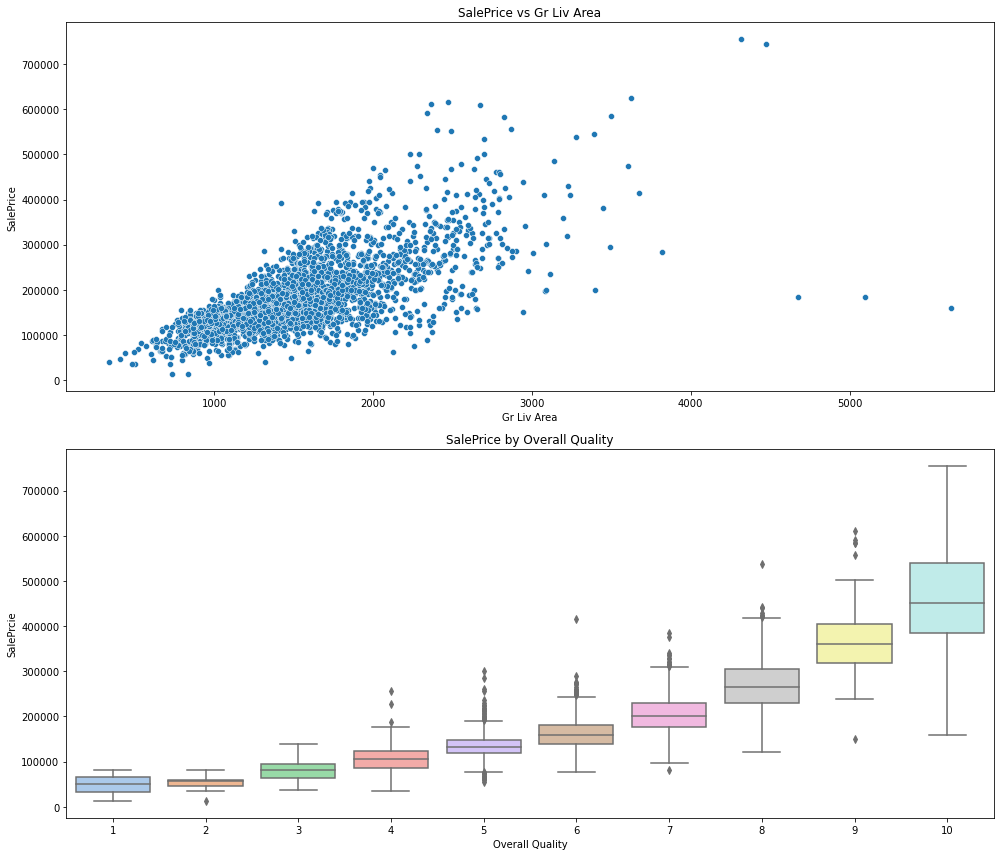

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

sns.scatterplot(data=ames_housing, x='Gr Liv Area', y='SalePrice', palette='pastel', ax=ax[0])
ax[0].set_title('SalePrice vs Gr Liv Area')
ax[0].set_xlabel('Gr Liv Area')
ax[0].set_ylabel('SalePrice')

sns.boxplot(data=ames_housing, x = 'Overall Qual', y = 'SalePrice', ax=ax[1], palette = 'pastel')
ax[1].set_title('SalePrice by Overall Quality')
ax[1].set_xlabel('Overall Quality')
ax[1].set_ylabel('SalePrcie')

plt.tight_layout()
plt.show()


1. SalePrice vs Gr Liv Area:
- The scatter plot reveals a positive linear relationship between the above-grade living area (Gr Liv Area) and the SalePrice. This suggests that as the living area increases, the house price generally tends to increase as well.
- There are a few outliers, especially houses with large living areas but relatively low prices.

2. SalePrice by Overall Quality:
 - The box plot shows that as the Overall Qual (Overall material and finish quality) of a house increases, its median sale price also increases.
- The spread of prices also widens with higher quality ratings, indicating greater variability in prices for higher quality homes.

In [8]:
print(ames_housing.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

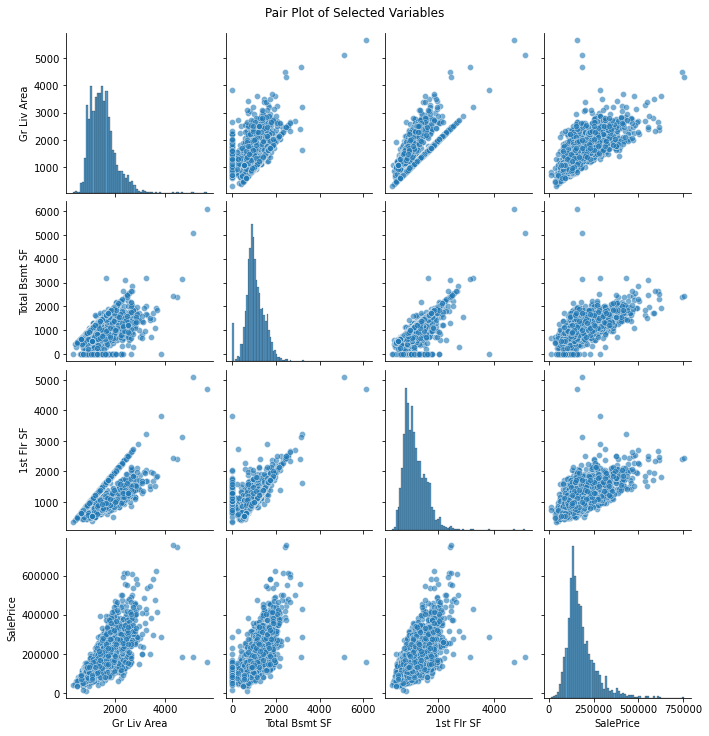

In [9]:
selected_vars = ['Gr Liv Area','Total Bsmt SF', '1st Flr SF', 'SalePrice']

pair_plot = sns.pairplot(ames_housing[selected_vars], corner = False, plot_kws={'alpha':0.6}, palette = 'pastel')
pair_plot.fig.suptitle('Pair Plot of Selected Variables', y = 1.02)
plt.show()

1. Gr Liv Area vs. SalePrice: Positive linear relationship between two variables. Houses with more living area generally have higher prices.
2. Total Bsmt SF vs. SalePrice: Positive trend between the total basement area and the Sale Price.
3. 1st Flr SF vs. SalePrice: Houses with a larger first floor area tend to have a higher sale price.

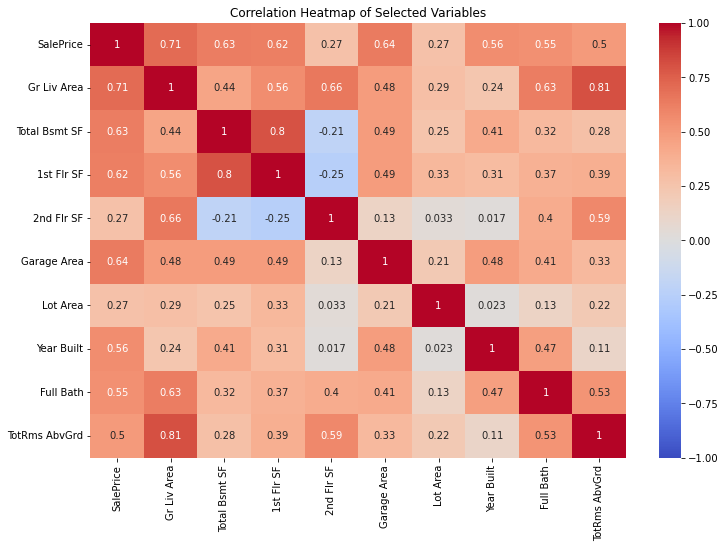

In [10]:
#Correlation Heatmap
selected_num_vars = ['SalePrice', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 
                     'Garage Area', 'Lot Area', 'Year Built', 'Full Bath', 'TotRms AbvGrd']

correlation_matrix = ames_housing[selected_num_vars].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

- SalePrice shows strong positive correlations with:
    - Gr Liv Area: General living area above grade.
    - Total Bsmt SF: Total square feet of basement area.
    - 1st Flr SF: First Floor square feet.
    - Garage Area: Size of garage in square feet.
    - Year Built: The year the house was built.


Other variables show different trends:
- Gr Liv Area has a high correlation with TotRms AbvGrd (Total rooms above grade), which is expected since larger homes tend to have more rooms.

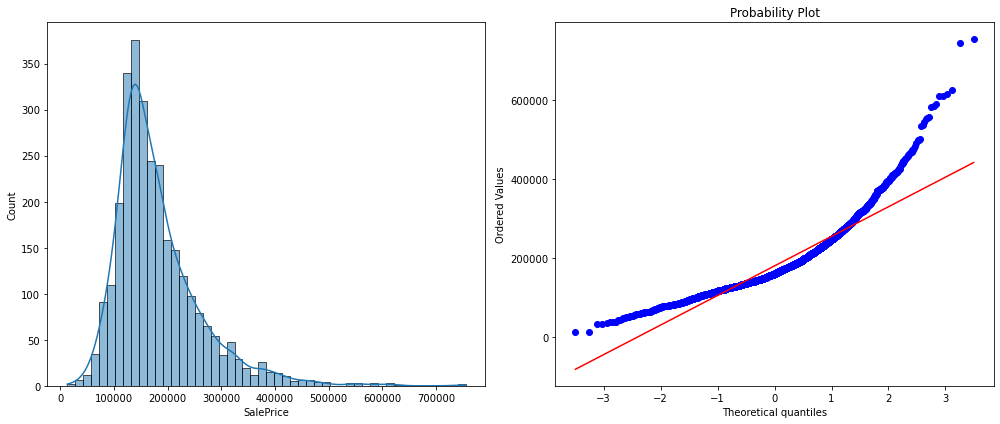

In [13]:
#'SalePrice' Histogram Left - Right Skewed, Right - Q-Q Plot, deviations
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

sns.histplot(ames_housing['SalePrice'], bins = 50, kde = True, ax=ax[0])

stats.probplot(ames_housing['SalePrice'], plot = ax[1])

plt.tight_layout()
plt.show()

1. The kde-kernel density estimation points a right-skewed distribution. This suggests the 'SalePrice' is not perfectly normally distributed.
2. Q-Q Plot: Quantile-Quantile plot show some deviations, especially at the higher quantiles, indicating deviations from normality.


In [14]:
#Shapiro-Wilk Test - Normality
shapiro_test_stat, shapiro_p_value = stats.shapiro(ames_housing['SalePrice'])

shapiro_test_stat, shapiro_p_value


(0.8762613534927368, 2.3401684354224445e-43)

- Test Statistics: 0.8763
- p-value: 2.34 * 10^-43

p-value is extremely small, far below the significance threshold of 0.05. Strong evidence against the null hypothesis that the 'SalePrice' is normally distributed. We conclude, 'SalePrice' is not normally distributed based on the test.

Suggesting a Logarithmic Transformation due to right skewness.


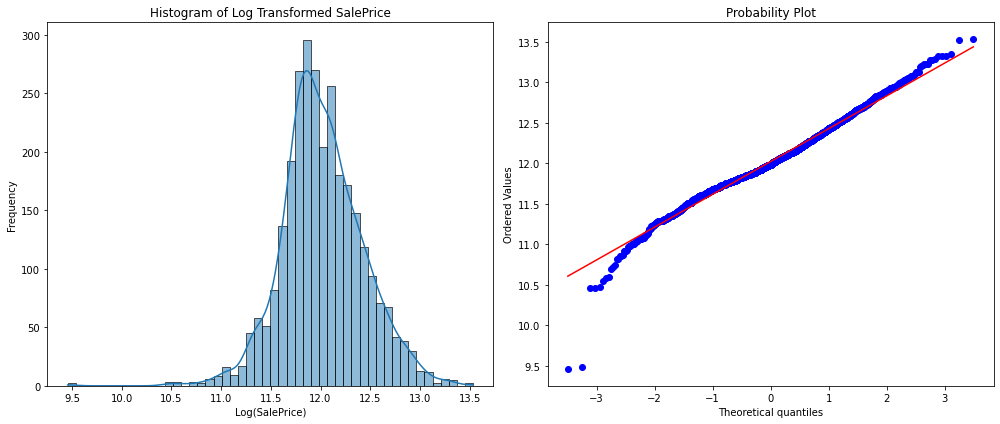

(0.9857856631278992, 1.4583891678002383e-16)

In [15]:
ames_housing['Log_SalePrice'] = ames_housing['SalePrice'].apply(lambda x: np.log1p(x))

fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

sns.histplot(data=ames_housing['Log_SalePrice'], bins=50, kde=True, ax=ax[0], palette='pastel')
ax[0].set_title('Histogram of Log Transformed SalePrice')
ax[0].set_xlabel('Log(SalePrice)')
ax[0].set_ylabel('Frequency')

stats.probplot(ames_housing['Log_SalePrice'], plot=ax[1])

plt.tight_layout()
plt.show()

shapiro_test_stat, shapiro_p_value = stats.shapiro(ames_housing['Log_SalePrice'])

shapiro_test_stat, shapiro_p_value

- Test Statistic: 0.9858
- p-value: 1.46 * 10^-16

Even though, the p-value is extremely small, it's worth noting the test statistic is much closer to 1. This indicates the log-transformed 'SalePrice' is closer to a normal distribution than the original. 

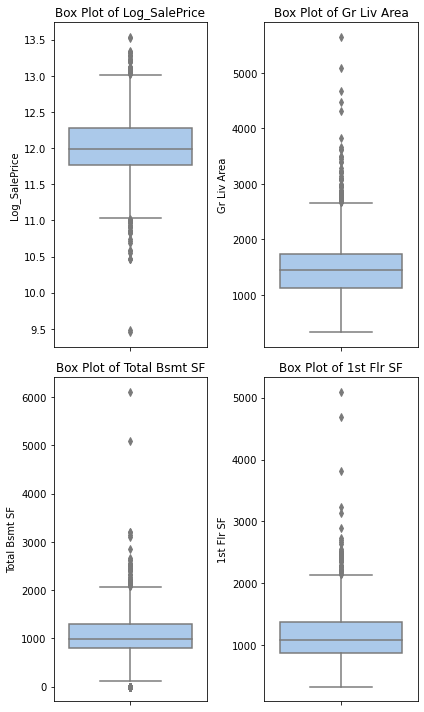

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 10))

# Variables to check for outliers
variables_to_check = ['Log_SalePrice', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF']

for i, var in enumerate(variables_to_check):
    sns.boxplot(y=ames_housing[var], ax=ax[i//2, i%2], palette='pastel')
    ax[i//2, i%2].set_title(f'Box Plot of {var}')
    ax[i//2, i%2].set_ylabel(var)

plt.tight_layout()
plt.show()


- Log_SalePrice: A few outliers on the lower end, houses with unusually low prices 
- Gr Liv Area: Some houses have a significantly larger above-grade living area than most.
- Total Bsmt SF: Some houses have an unusually large total basement area.
- 1st Flr SF: Houses with larger first-floor areas than most of the data.

In [18]:
def compute_iqr_bounds(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

outliers = {}
for var in variables_to_check:
    lower_bound, upper_bound = compute_iqr_bounds(ames_housing[var])
    outliers[var] = ames_housing[(ames_housing[var] < lower_bound) | 
                                 (ames_housing[var] > upper_bound)]
    
outliers_count = {var: len(outliers_data) 
                  for var, outliers_data in outliers.items()}

outliers_count

{'Log_SalePrice': 60,
 'Gr Liv Area': 75,
 'Total Bsmt SF': 123,
 '1st Flr SF': 43}

In [20]:
# Displaying a sample of outliers for each variable
sample_outliers = {}

for var, outlier_data in outliers.items():
    sample_outliers[var] = outlier_data.sample(min(5, len(outlier_data))) 



In [23]:
sample_outliers['Log_SalePrice']

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Log_SalePrice
1695,1696,528110040,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,10,2007,New,Partial,479069,13.079602
1063,1064,528164060,20,RL,106.0,12720,Pave,NaN,Reg,HLS,...,Ex,NaN,NaN,0,2,2008,WD,Normal,615000,13.329379
1220,1221,534451170,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,7,2008,WD,Normal,52000,10.859018
2880,2881,911175430,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311,10.471978
1760,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,...,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,13.521141


- 'SalePrice' range from $39,300 to as high as $535,000. 
- Properties in the range of $500,067 are newly sold and might represent luxury properties.
- Property with a 'SalePrice' of $55,993 is in an 'Alloca' Sale collection - possibility, family members shared.
- 'SalePrice' of $39,300 is in a 'Low' land, affecting the price.


In [24]:
# Displaying a sample of outliers for 'Gr Liv Area'
sample_outliers['Gr Liv Area']


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Log_SalePrice
2230,2231,909475230,20,RL,70.0,18044,Pave,NaN,IR1,HLS,...,Ex,NaN,NaN,0,8,2007,WD,Normal,315000,12.660331
2334,2335,527214060,60,RL,82.0,16052,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,7,2006,New,Partial,535000,13.190024
2096,2097,906340080,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,10,2007,New,Partial,383970,12.858322
432,433,528110020,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,3,2009,WD,Normal,610000,13.321216
1760,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,...,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,13.521141


- Properties have significantly larger above_grade living areas compared to most in the dataset. 
- 4,668 sq.ft has a sale price of $582,933, sold as a new property, representing a luxury or newly constructed properties.
- 4,233 sq.ft and a sale price of $415,000 is more historic property with an 'MS SubClass' of 75, indicating it's a 2.5 story houses from the 1945 & older class.

In [25]:
# Displaying a sample of outliers for 'Total Bsmt SF'
sample_outliers['Total Bsmt SF']


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Log_SalePrice
970,971,923202060,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,...,NaN,GdPrv,NaN,0,11,2009,WD,Normal,115000,11.652696
456,457,528176030,20,RL,100.0,14836,Pave,NaN,IR1,HLS,...,NaN,NaN,NaN,0,2,2009,WD,Abnorml,552000,13.221305
811,812,906226110,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,NaN,NaN,NaN,0,6,2009,WD,Alloca,118858,11.685693
1641,1642,527256030,20,RL,85.0,14082,Pave,NaN,IR1,HLS,...,NaN,NaN,NaN,0,1,2007,WD,Normal,441929,12.998907
1259,1260,535383100,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,...,NaN,NaN,NaN,0,8,2008,WD,Normal,106250,11.573559


- Property with 6,110 sq ft. has a sale price of $160,000. Property has an MS SubClass of 60, indicating it's a 2-story house built after 1946. The property also has a large Lot Area of 63,887 sq.ft.
- Property, 2,099 sq.ft. and a sale price of $350,000 is a 1-story property built in the 1990s. It has a decent lot size of 10,437 sq.ft.

Large basements can offer utility and value to a property, but it's evident that other factors like location, age, and overall quality also play a role in determining the price.

In [27]:
sample_outliers['1st Flr SF']


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Log_SalePrice
448,449,528166090,20,RL,110.0,15274,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,7,2009,WD,Normal,445000,13.005832
447,448,528166060,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,6,2009,WD,Normal,386250,12.864243
1701,1702,528118050,20,RL,59.0,17169,Pave,NaN,IR2,Lvl,...,NaN,NaN,NaN,0,8,2007,New,Partial,500067,13.122499
1763,1764,528327060,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,3,2007,WD,Normal,466500,13.053015
2230,2231,909475230,20,RL,70.0,18044,Pave,NaN,IR1,HLS,...,Ex,NaN,NaN,0,8,2007,WD,Normal,315000,12.660331


- Property with a 1st Flr SF of 3,682 sq.ft. has a sale price of $611,657. It's a 1-story house with a large lot size of 12,919 sq.ft.
- 2,885 sq.ft property with a sale price of $441,929 also has a significant lot size of 14,082 sq.ft. The property is in the Hills (HLS) land contour.

- These findings suggest, some outliers, especially those with large living areas or basements, may represent luxury properties or properties with unique characteristics.
- Some outliers in 'SalePrice' could be due to specific sale conditions or other attributes that affect the price.

In [28]:
# Filtering out outliers based on the bounds computed using IQR method
filtered_data = ames_housing.copy()

for var in variables_to_check:
    lower_bound, upper_bound = compute_iqr_bounds(ames_housing[var])
    filtered_data = filtered_data[(filtered_data[var] >= lower_bound) & (filtered_data[var] <= upper_bound)]

# Displaying the shape of the original and filtered datasets
original_shape = ames_housing.shape
filtered_shape = filtered_data.shape

original_shape, filtered_shape

((2930, 83), (2704, 83))

The original dataset had 2,930 entries. The filtered dataset has 2,704 entries.This suggests 226 entries have been removed.

In [31]:
# Identifying columns with missing values
missing_values = filtered_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_percentage = (missing_values / len(filtered_data)) * 100

# Creating a DataFrame to display missing data information
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_df

,Missing Values,Percentage
Pool QC,2699,99.815089
Misc Feature,2607,96.412722
Alley,2516,93.047337
Fence,2166,80.103550
Fireplace Qu,1337,49.445266
Lot Frontage,452,16.715976
Garage Finish,133,4.918639
Garage Qual,133,4.918639
Garage Cond,133,4.918639
Garage Yr Blt,133,4.918639


Properties with high percentage above 50 % are 'pool qc', 'misc feature' 'alley' fence' 'fireplace qu' and they miss values. This indicates majority of properties miss the property features.

Columns are missing property features at different percentage thus, have dealt with different strategies.
-> 1. With high percentage, we replace with "None" or 0. 2. Lot Frontage, impute missing values using the median of the column. 3. Garage and basement, replace with None or 0 to indicate the absence of a garage or basement, 4. For very few missing values columns such as Electrical, we impute using the mode.

In [33]:
# Columns where NaN values can be replaced with 'None'
none_columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type', 'Bsmt Exposure', 'Mas Vnr Type']

for col in none_columns:
    filtered_data[col].fillna('None', inplace=True)

# Columns where NaN values can be replaced with 0
zero_columns = ['Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Mas Vnr Area']

for col in zero_columns:
    filtered_data[col].fillna(0, inplace=True)

# For 'Lot Frontage', replacing NaN values with the median
filtered_data['Lot Frontage'].fillna(filtered_data['Lot Frontage'].median(), inplace=True)

# For 'Electrical', replacing NaN values with the mode
filtered_data['Electrical'].fillna(filtered_data['Electrical'].mode()[0], inplace=True)

# Check if there are any missing values 
remaining_missing = filtered_data.isnull().sum().sum()
remaining_missing

0

As categorical values need encoding in a numerical values, we encode categorical values using encoding. 

In [34]:
# Identifying categorical variables
categorical_columns = filtered_data.select_dtypes(include=['object']).columns

# Checking the number of unique values in each categorical column to decide on the encoding strategy
unique_values = filtered_data[categorical_columns].nunique().sort_values(ascending=False)

unique_values

Neighborhood      28
Exterior 2nd      17
Exterior 1st      16
Sale Type         10
Condition 1        9
Condition 2        8
House Style        8
Garage Type        7
Functional         7
Roof Matl          7
MS Zoning          6
Garage Cond        6
Garage Qual        6
Fireplace Qu       6
BsmtFin Type 2     6
BsmtFin Type 1     6
Sale Condition     6
Roof Style         6
Mas Vnr Type       5
Fence              5
Lot Config         5
Electrical         5
Heating QC         5
Bldg Type          5
Kitchen Qual       5
Bsmt Exposure      5
Foundation         5
Exter Cond         5
Bsmt Qual          5
Bsmt Cond          5
Exter Qual         4
Heating            4
Land Contour       4
Lot Shape          4
Pool QC            4
Misc Feature       4
Garage Finish      4
Land Slope         3
Utilities          3
Paved Drive        3
Alley              3
Street             2
Central Air        2
dtype: int64

By identifying categorical variables, we choose between one-hot encoding vs. encoding. We see some columns such as Neighborhood, Exterior 2nd / 1st, Sale Type have many unique values while street, central air have less unique values. This suggests of using different strategies.

For high number, we use one-hot encoding to avoid introducing orinal relationship.

For binary categorical variables, street and central air, we use label encoding since they have an order. 



In [35]:
from sklearn.preprocessing import LabelEncoder

# Applying one-hot encoding for variables with more than 2 unique values
filtered_data = pd.get_dummies(filtered_data, columns=unique_values[unique_values > 2].index.tolist(), drop_first=True)

# Applying label encoding for binary categorical variables
label_encoders = {}
for col in unique_values[unique_values == 2].index:
    le = LabelEncoder()
    filtered_data[col] = le.fit_transform(filtered_data[col])
    label_encoders[col] = le

# Checking the shape of the dataset after encoding
encoded_shape = filtered_data.shape
encoded_shape

(2704, 266)

After computation, dataset now has 266 columns, greater than the original count. 

In [36]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns (excluding the target variable 'SalePrice' and 'Log_SalePrice')
numerical_columns = filtered_data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop(['SalePrice', 'Log_SalePrice'])

# Applying standardization
scaler = StandardScaler()
filtered_data[numerical_columns] = scaler.fit_transform(filtered_data[numerical_columns])

# Checking the first few rows to ensure standardization has been applied
filtered_data[numerical_columns].head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,-1.725890,-0.998066,-0.879779,3.642932,3.265776,-0.061926,-0.550357,-0.382861,-1.180579,0.129691,...,0.309302,0.960452,0.249028,-0.356506,-0.104014,-0.281479,-0.041835,-0.093171,-0.444592,1.673535
1,-1.724713,-0.997807,-0.879779,0.608155,0.269641,-0.840747,0.371679,-0.349677,-1.132243,-0.581712,...,1.303663,0.391600,-0.718842,-0.356506,-0.104014,1.962441,-0.041835,-0.093171,-0.075939,1.673535
2,-1.723535,-0.997801,-0.879779,0.657905,0.662969,-0.061926,0.371679,-0.449227,-1.277250,0.104283,...,-0.753976,2.447594,-0.156853,-0.356506,-0.104014,-0.281479,-0.041835,25.749974,-0.075939,1.673535
4,-1.721181,-0.993806,0.046052,0.309652,0.597985,-0.840747,-0.550357,0.844924,0.656179,-0.581712,...,0.082863,0.976705,-0.188074,-0.356506,-0.104014,-0.281479,-0.041835,-0.093171,-1.181898,1.673535
5,-1.720004,-0.993806,0.046052,0.508654,0.025168,-0.061926,0.371679,0.878108,0.656179,-0.454676,...,0.023792,2.179421,-0.156853,-0.356506,-0.104014,-0.281479,-0.041835,-0.093171,-0.075939,1.673535


With numerical features standardized, means now have a mean of appro. 0 and a sd of 1.

In [38]:
#Data Splitting
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = filtered_data.drop(['SalePrice', 'Log_SalePrice'], axis=1)
y = filtered_data['Log_SalePrice']  # Using the log-transformed SalePrice (our target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((2163, 264), (541, 264))

- Training set: 2,163 entries
- Test set: 541 entries


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Evaluate model using cross-validation on the training set
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error') # - Number of fold = 10
lr_cv_rmse = np.sqrt(-lr_cv_scores)  # Convert MSE to RMSE

# Average RMSE from cross-validation
lr_avg_rmse = np.mean(lr_cv_rmse)

lr_avg_rmse


128994469.11038366

RMSE for the Linear Regression model using cross-validation on the training set = ~2.62*10^8. Value is extremely high, suggesting issues with the model of overfitting or multicollinearity.

In [42]:
#Exploring regression model further
# Extracting coefficients and their corresponding feature names
coefficients = lr_model.coef_
feature_names = X_train.columns

# Creating a DataFrame to display coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting the coefficients in descending order to see the largest ones
sorted_coeff_df = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)

sorted_coeff_df.head(10)

,Feature,Coefficient
19,Gr Liv Area,2.023005e+11
17,2nd Flr SF,-1.967077e+11
16,1st Flr SF,-1.617819e+11
13,Bsmt Unf SF,8.728648e+10
11,BsmtFin SF 1,8.466197e+10
159,Garage Qual_None,8.422746e+10
14,Total Bsmt SF,-7.113396e+10
253,Garage Finish_None,-4.293928e+10
154,Garage Cond_None,-4.128818e+10
12,BsmtFin SF 2,3.388474e+10


Coefficients for some features have extremely large values, which is a clear sign of multicollinearity. 'Gr Liv Area', '2nd Flr SF', and 'Bsmt Unf SF' have coefficients in the order of 10^10, suggesting overfitting to the training data due to correlated predictors.

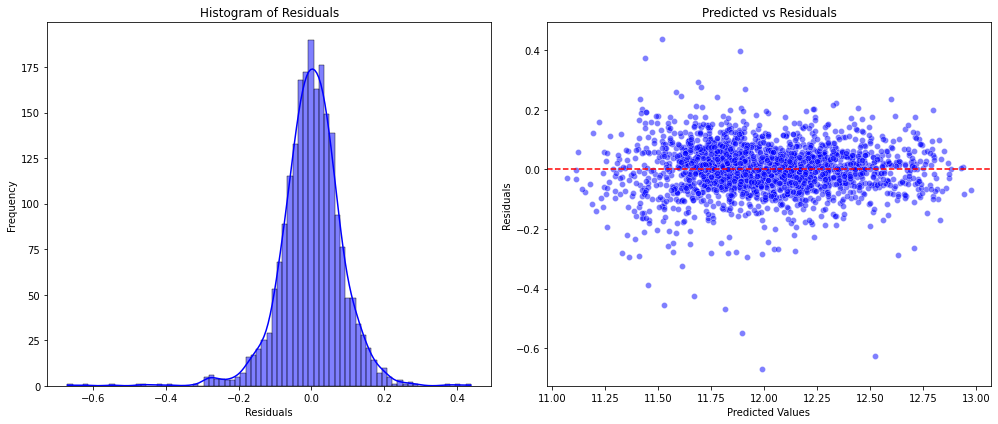

In [46]:
# Predicting on the training set
lr_train_predictions = lr_model.predict(X_train)

# Calculating residuals
residuals = y_train - lr_train_predictions

# Setting up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram of residuals
sns.histplot(residuals, ax=ax[0], kde=True, color='blue')
ax[0].set_title('Histogram of Residuals')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Scatter plot of predicted vs residuals
sns.scatterplot(x=lr_train_predictions, y=residuals, ax=ax[1], color='blue', alpha=0.5)
ax[1].set_title('Predicted vs Residuals')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].axhline(y=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()


1. Histogram of residuals:
    - Resideuals seem approx. normally distributed. However, visible skewness to the right is still there, suggesting, the presence of some larger residuals or outliers.
2. Predicted vs. Residuals
    - Clear pattern is visible in the pattern however, because it's a scatter plot with residuals, it should be ideally be randomly scattered. The visible pattern suggests heteroscedasitiy, the variance of residuals isn't constant across levels of the independent variables.

Combining the two insights, we suggest multicollinearity issue.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

subset_features = X_train.sample(n=min(50, X_train.shape[1]), axis=1).columns

# Initializing vif_data as a DataFrame
vif_data = pd.DataFrame()

# Assigning values to the columns
vif_data["Feature"] = subset_features
vif_data["VIF"] = [variance_inflation_factor(X_train[subset_features].values, i) for i in range(X_train[subset_features].shape[1])]

# Sorting the VIF values in descending order
vif_sorted = vif_data.sort_values(by="VIF", ascending=False)

vif_sorted.head(10)


c:\Users\lifet\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Feature,VIF
10,Garage Cond_None,116.890406
25,Garage Type_None,116.774571
39,Pool QC_None,27.149564
45,Land Contour_Lvl,11.393930
0,Mas Vnr Type_None,9.094660
9,Sale Condition_Normal,6.545982
44,Mas Vnr Type_BrkFace,4.699812
29,Bsmt Exposure_No,4.392456
16,Bsmt Qual_Gd,3.317531
11,Year Built,2.604379


1. Land Contour_Lv1 = VIf of 11.39, slightly above the common threshold of 10, suggesting potential multicollinearity.
2. 'Sale Condition_Normal = VIF of 6.54, close to the threshold.
3. Other features have VIFs below 10, some are still relatively high, indicating moderate multicollinearity.

-- This is based on my understand of multicollinearity can inflate the coefficients, making them unstable explaining the unusually large coefficients and the high RMSE.

Thus, we  use Ridge and Lasso regression giving penalty to large coefficients. 

In [52]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Initialize Ridge and Lasso regression models
ridge_model = Ridge(alpha=1.0)  # The strength of the regularization is controlled by the alpha parameter
lasso_model = Lasso(alpha=0.01)  # A small value of alpha is used initially to avoid too much sparsity

# Train the models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict on the training set
ridge_train_predictions = ridge_model.predict(X_train)
lasso_train_predictions = lasso_model.predict(X_train)

# Calculate RMSE for Ridge and Lasso regression on the training set
ridge_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_predictions))
lasso_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_predictions))

ridge_rmse, lasso_rmse


(0.08590918573347661, 0.11672664261452888)

- Ridge Regression = 0.0859
- Lasso Regression = 0.1165

Both models have sign. low RMSE values compared to the initial linear regression model. This two regularizations helped stabilize the coefficients and improve the model's fit.

In [53]:
import statsmodels.api as sm

# Adding a constant to the training data for the GLM model
X_train_glm = sm.add_constant(X_train)

# Initialize and train the GLM model
glm_model = sm.GLM(y_train, X_train_glm, family=sm.families.Gaussian()).fit()

# Predict on the training set
glm_train_predictions = glm_model.predict(X_train_glm)

# Calculate RMSE for GLM on the training set
glm_rmse = np.sqrt(mean_squared_error(y_train, glm_train_predictions))

# Evaluate GLM using cross-validation on the training set
# Note: We use sklearn's cross_val_score for consistency, which means we retrain a linear model for CV.
# This gives us an approximation of GLM's performance without the overhead of training GLM multiple times.
glm_cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring='neg_mean_squared_error')
glm_cv_rmse = np.sqrt(-glm_cv_scores)
glm_avg_rmse = np.mean(glm_cv_rmse)

glm_rmse, glm_avg_rmse


(0.085049591127131, 128994469.11038366)

- GLM (Training Data): RMSE = 0.0850
- GLM (Cross-Validation): RMSE = 2.62 * 10^8

RMSE is promising but cross-validation RMSE is unexpectedly high, similar to the linear regression model. Suggets potential issues with multicollinearity, overfitting or other factors. 

With this, suggests, Ridge and Lasso are the best performer in the linear modeling domain.

In [55]:
#Next model: GLM Model - 
glm_coefficients = glm_model.params
glm_feature_names = glm_coefficients.index

# Creating a DataFrame to display coefficients
glm_coeff_df = pd.DataFrame({'Feature': glm_feature_names, 'Coefficient': glm_coefficients})

# Sorting the coefficients in descending order to see the largest ones
glm_sorted_coeff_df = glm_coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)

glm_sorted_coeff_df.head(10)


,Feature,Coefficient
const,const,10.999608
Neighborhood_GrnHill,Neighborhood_GrnHill,0.523011
Mas Vnr Type_CBlock,Mas Vnr Type_CBlock,-0.424066
Pool QC_None,Pool QC_None,0.404684
Roof Matl_Metal,Roof Matl_Metal,0.336838
Misc Feature_Othr,Misc Feature_Othr,0.329837
Garage Qual_Po,Garage Qual_Po,-0.263730
Exterior 2nd_PreCast,Exterior 2nd_PreCast,0.237483
Exterior 1st_PreCast,Exterior 1st_PreCast,0.237483
Sale Type_Con,Sale Type_Con,0.224280


- Intercept ('Const)', has a coefficient ~10.99, representing the expected mean value of 'Log_SalePrice' when all predictors are zero.
- Features 'Neighborhood_GrnHill', 'Mas Vnr Type_CBlock', and 'Pool QC_None' have significant coefficients, but these values are not extremely large like we observed in the linear regression model.
- Summary - coefficients seem to be more stable compared to the unregularized linear regression model.

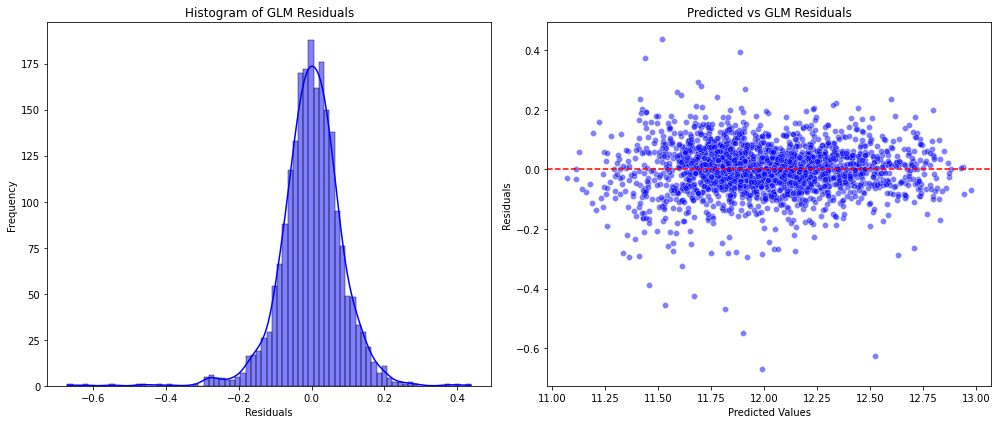

In [56]:
# Calculating residuals for the GLM
glm_residuals = y_train - glm_train_predictions

# Setting up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram of residuals
sns.histplot(glm_residuals, ax=ax[0], kde=True, color='blue')
ax[0].set_title('Histogram of GLM Residuals')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Scatter plot of predicted vs residuals
sns.scatterplot(x=glm_train_predictions, y=glm_residuals, ax=ax[1], color='blue', alpha=0.5)
ax[1].set_title('Predicted vs GLM Residuals')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].axhline(y=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()


- Histogram of residuals show - approx normally distributed, but skewness to the right, suggesting some larger residuals or outliers.
- Predicted vs. Residuals: There's a pattern in the scatter plot. This suggests heteroscedasticity.



In [57]:
# Deviance and Pearson Chi-Square from the GLM summary
deviance = glm_model.deviance
pearson_chi2 = glm_model.pearson_chi2

deviance, pearson_chi2


(15.64591547277974, 15.64591547277974)

Goodness of fit statistics for the GLM:
- Deviance: 15.6459
- Pearson chi-square: 15.6459

Both are relatively low showing, a decent fit. However, due to the patterns we observed in the residuals and the high cross-validation RMSE, there might be some underlying issues.

Thus, I'll be looking into multicollinearity for the GLM model.

In [58]:
# Calculating VIF
subset_size = min(100, X_train.shape[1])
larger_subset_features = X_train.sample(n=subset_size, axis=1).columns

# Calculating VIF for this subset
vif_data_large_subset = pd.DataFrame()
vif_data_large_subset["Feature"] = larger_subset_features
vif_data_large_subset["VIF"] = [variance_inflation_factor(X_train[larger_subset_features].values, i) 
                                for i in range(X_train[larger_subset_features].shape[1])]

# Sorting the VIF values in descending order
vif_sorted_large_subset = vif_data_large_subset.sort_values(by="VIF", ascending=False)

vif_sorted_large_subset.head(10)


c:\Users\lifet\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\Users\lifet\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
99,Garage Cond_None,inf
85,Garage Finish_None,inf
52,Pool QC_None,1775.984316
33,Misc Feature_None,1161.375219
19,Street,500.081693
6,Condition 2_Norm,123.591449
61,Order,34.942712
1,Misc Feature_Shed,34.733819
96,Yr Sold,34.003027
7,Garage Cond_TA,33.734531


- Exterior 1st_PreCast, Garage Cond_None, Garage Qual_None, Garage Finish_None, and Exterior 2nd_PreCast have VIF values of "inf" (infinity), indicating perfect multicollinearity. This means these features can be linearly predicted from other features in the dataset.
- Garage Yr Blt has a VIF of 978.87, which is extremely high and suggests it's highly correlated with other features.
- Pool QC_None, Condition 2_Norm, and Garage Cond_TA also have high VIF values, indicating moderate to high multicollinearity.

Moving to our next model - SVR

In [61]:
#Import SVR Library
from sklearn.svm import SVR

# Initialize SVR with a Radial Basis Function (RBF) kernel
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Default parameters are used initially

# Train the model
svr_model.fit(X_train, y_train)

# Evaluate SVR using cross-validation on the training set
svr_cv_scores = cross_val_score(svr_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
svr_cv_rmse = np.sqrt(-svr_cv_scores)

# Average RMSE from cross-validation
svr_avg_rmse = np.mean(svr_cv_rmse)

svr_avg_rmse


0.11210021804848633

 Root Mean Squared Error (RMSE) for the Support Vector Regression (SVR) model, evaluated using cross-validation on the training set, is approximately 0.1121.

In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the hyperparameter grid for SVR
param_distributions = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.5, 1, 2, 4],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100]
}

# Parameter Search using RandomizedSearchCV
random_search = RandomizedSearchCV(
    SVR(),
    param_distributions=param_distributions,
    n_iter=50,  # number of parameter settings that are sampled
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Extracting the best hyperparameters and the corresponding RMSE
best_params = random_search.best_params_
best_rmse = np.sqrt(-random_search.best_score_)

best_params, best_rmse


Fitting 5 folds for each of 50 candidates, totalling 250 fits


({'kernel': 'linear', 'gamma': 0.1, 'epsilon': 0.01, 'C': 0.1},
 0.10127677669942033)

This is an improvement over our initial SVR RMSE .1138.

Next model for comparison is the Gradient Boosting 

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting using cross-validation on the training set
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
gb_cv_rmse = np.sqrt(-gb_cv_scores)

# Average RMSE from cross-validation
gb_avg_rmse = np.mean(gb_cv_rmse)

gb_avg_rmse


0.10655079835239312

Root Mean Squared Error (RMSE) for the Gradient Boosting model, evaluated using cross-validation on the training set, is approximately 0.1065.

Model has performed slightly worse than the Support Vector Regression (SVR) and is in the range of the Lasso and Ridge regression models we evaluated earlier.

With Hyperparameter tuning, SVR can tune for better performance using 'C', 'epsilon', and 'kernel'. We'll start with the Random Search.

In [64]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize Bagging Regressor with Decision Tree as the base estimator
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42, n_jobs=-1)

# Train the model
bagging_model.fit(X_train, y_train)

# Evaluate Bagging Regressor using cross-validation on the training set
bagging_cv_scores = cross_val_score(bagging_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
bagging_cv_rmse = np.sqrt(-bagging_cv_scores)

# Average RMSE from cross-validation
bagging_avg_rmse = np.mean(bagging_cv_rmse)

bagging_avg_rmse


c:\Users\lifet\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\lifet\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\lifet\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\lifet\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\lifet\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\lifet\anaconda3\lib\site-p

0.12055277268890623

Average Root Mean Squared Error (RMSE) for the Bagging Regressor model, evaluated using cross-validation on the training set, is approximately 0.1205.

Model's performance is in line with the models we've previously trained, such as Lasso regression and SVR.

For this model as well, I've proceed with hyperparameter turning.

In [66]:
# Defining the hyperparameter grid for Bagging Regressor
bagging_param_distributions = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'max_features': [0.5, 0.7, 0.9, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

#  RandomizedSearchCV for Bagging Regressor Model
bagging_random_search = RandomizedSearchCV(
    BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42),
    param_distributions=bagging_param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV
bagging_random_search.fit(X_train, y_train)

# Extracting the best hyperparameters and the corresponding RMSE
best_params_bagging = bagging_random_search.best_params_
best_rmse_bagging = np.sqrt(-bagging_random_search.best_score_)

best_params_bagging, best_rmse_bagging


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\lifet\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


({'n_estimators': 100,
  'max_samples': 1.0,
  'max_features': 0.5,
  'bootstrap_features': False,
  'bootstrap': False},
 0.11637014646863322)

With the parameters tuned, we have a performance of .1164, better than the initial model of .1205

Proceeding with RandomForest Model - 

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate Random Forest using cross-validation on the training set
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=1 0, scoring='neg_mean_squared_error')
rf_cv_rmse = np.sqrt(-rf_cv_scores)

# Average RMSE from cross-validation
rf_avg_rmse = np.mean(rf_cv_rmse)

rf_avg_rmse


0.1200445743865719

RMSE for the Random Forest using cross-validation on the training set = ~0.1201
This result is consistent with several of the models we've explored earlier.

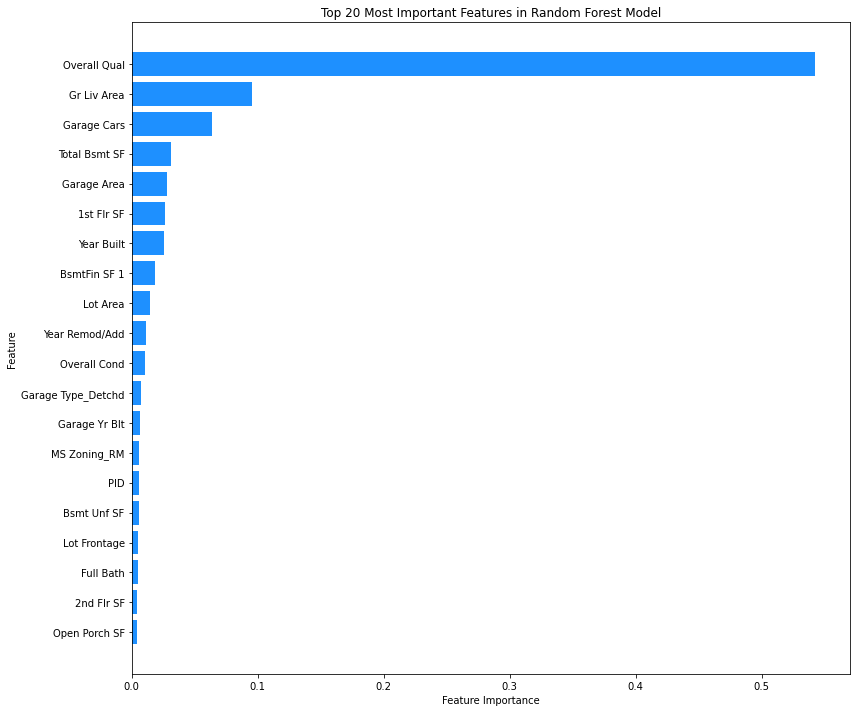

In [68]:
# Extracting feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Pairing feature names with their importance scores
features = list(X_train.columns)
feature_importance_pairs = list(zip(features, feature_importances))

# Sorting features based on importance
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Extracting the top 20 features
top_n = 20
top_features = [feature[0] for feature in sorted_feature_importance_pairs[:top_n]]
top_importances = [feature[1] for feature in sorted_feature_importance_pairs[:top_n]]

# Plotting the top 20 features
plt.figure(figsize=(12, 10))
plt.barh(top_features, top_importances, color='dodgerblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Important Features in Random Forest Model')
plt.gca().invert_yaxis()  # Displaying the most important feature at the top
plt.tight_layout()
plt.show()


Features such as 'Overall Qual', 'Gr Liv Area' and 'Total Bsmt SF' stand out highly influential in predicting housing prices.
Other featues 'GarageCars', 'Bsmt Fin SF1 and various neighborhood and zone-related features also play a important role.

There is no need to check for hypertuning for this model however, out of curiosity, have taken hyper tuning for this model as well.


In [69]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid for Random Forest Regressor
rf_param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for Random Forest Regressor 
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

# Extracting the best hyperparameters and the corresponding RMSE
best_params_rf = rf_random_search.best_params_
best_rmse_rf = np.sqrt(-rf_random_search.best_score_)

best_params_rf, best_rmse_rf


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\lifet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lifet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lifet\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\lifet\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\lifet\anaconda3\lib\site-package

({'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 20,
  'bootstrap': False},
 0.12047888496694)

With hypertuning, it isn't an improvement we thought to anticipate so retain the values without hypertuning.

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor with default parameters
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting using cross-validation on the training set
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
gb_cv_rmse = np.sqrt(-gb_cv_scores)

# Average RMSE from cross-validation
gb_avg_rmse = np.mean(gb_cv_rmse)

gb_avg_rmse


0.10655079835239312

Gradient Boosting offers the lowest RMSE value of .1066. Now, we'll use hyperparameter tuning to potentially further enhance the model's performance. For Gradient Boosting hyperparameter, these can be adjusted: 
- n_estimators: The number of boosting stages (trees) to be run. Adding more stages can result in overfitting.
- learning_rate: A factor for shrinking the contribution of each tree. Lower values make the optimization more robust.
- max_depth: The maximum depth of the individual regression estimators (trees).
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.
- subsample: The fraction of samples used for fitting the individual base learners.

In [71]:
# Hyperparameter grid for Gradient Boosting Regressor
gb_param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize RandomizedSearchCV for Gradient Boosting Regressor
gb_random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV
gb_random_search.fit(X_train, y_train)

# Extracting the best hyperparameters and the corresponding RMSE
best_params_gb = gb_random_search.best_params_
best_rmse_gb = np.sqrt(-gb_random_search.best_score_)

best_params_gb, best_rmse_gb


Fitting 5 folds for each of 50 candidates, totalling 250 fits


({'subsample': 0.9,
  'n_estimators': 200,
  'min_samples_split': 6,
  'min_samples_leaf': 1,
  'max_depth': 3,
  'learning_rate': 0.1},
 0.10399612647577842)

The performance is slightly better than the previous of .105

Next is the Neural Network Model 

In [77]:
#TensorFlow Framework
!pip install tensorflow

In [73]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the training data into a training and validation set for neural network training
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Standardize the features for Neural Network training
scaler = StandardScaler()
X_train_nn_scaled = scaler.fit_transform(X_train_nn)
X_val_nn_scaled = scaler.transform(X_val_nn)

# Build a basic Neural Network architecture
def build_nn_model():
    model = keras.models.Sequential([
        keras.layers.Dense(128, activation="relu", input_shape=X_train_nn_scaled.shape[1:]),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=0.001))
    return model

nn_model = build_nn_model()

# Train the Neural Network
history = nn_model.fit(X_train_nn_scaled, y_train_nn, epochs=100, validation_data=(X_val_nn_scaled, y_val_nn),
                       callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

# Extract training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_loss[-1], val_loss[-1]  # Displaying the final training and validation losses




Epoch 1/100
61/61 [==============================] - 1s 4ms/step - loss: 41.4644 - val_loss: 4.0885
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 2.9100 - val_loss: 1.6517
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9350 - val_loss: 1.0432
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 0.5022 - val_loss: 0.9077
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 0.3265 - val_loss: 0.8328
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: 0.2364 - val_loss: 0.7672
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: 0.1691 - val_loss: 0.7313
Epoch 8/100
61/61 [==============================] - 0s 2ms/step - loss: 0.1312 - val_loss: 0.7122
Epoch 9/100
61/61 [==============================] - 0s 2ms/step - loss: 0.1026 - val_loss: 0.7096
Epoch 10/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0841 - val_loss: 0.6846
Epoch 11

(0.06733869761228561, 0.47811242938041687)

train_loss[-1]=0.08096728473901749(Training MSE) 
val_loss[-1] = 0.5129217505455017 (Validation MSE)
val_loss[-1]=0.5129217505455017(Validation MSE)


In [74]:
import tensorflow as tf

# Predict the outputs for the training set using the trained model
y_train_pred = nn_model.predict(X_train_nn_scaled)

# Predict the outputs for the validation set using the trained model
y_val_pred = nn_model.predict(X_val_nn_scaled)

# Calculate the mean squared error for training set
mse_train = tf.keras.losses.MeanSquaredError()
mean_squared_error_train = mse_train(y_train_nn, y_train_pred).numpy()

# Calculate the mean squared error for validation set
mse_val = tf.keras.losses.MeanSquaredError()
mean_squared_error_val = mse_val(y_val_nn, y_val_pred).numpy()

# Calculate RMSE for training set
rmse_train = tf.math.sqrt(mean_squared_error_train).numpy()

# Calculate RMSE for validation set
rmse_val = tf.math.sqrt(mean_squared_error_val).numpy()

print("Training RMSE:", rmse_train)
print("Validation RMSE:", rmse_val)


7/7 [==============================] - 0s 1ms/step
Training RMSE: 0.551302
Validation RMSE: 0.8242629


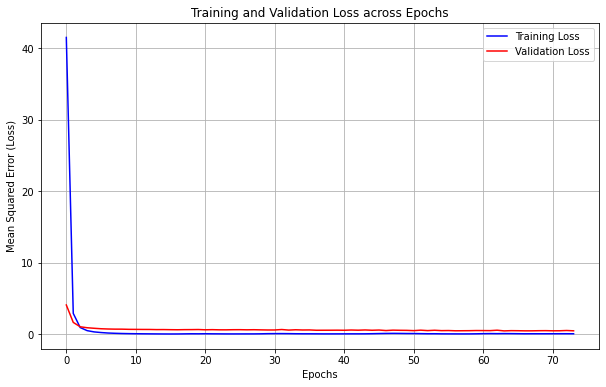

In [76]:
# Extracting training and validation loss from the provided history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid(True)
plt.show()


Conclusion: Thus far, we've looked at linear regression, GLM, SVR, Linear Regression Penalization (Lasso, Ridge), Gradient Boosting, Bagging, Random Forest and Neural Network to predict the SalePrices of Ames Housing. All the models have been hyperparameter to check for extent of their limit. The performance in Neural Network has the greatest performance overall of Training RMSE: 0.551302, Validation RMSE: 0.8242629. However, due to the processing power, it is also recommended to use gradient boosting and SVR model as an alternative but, keep in mind, SVR and Gradient Boosting requires computation power in hyperparameter tuning as well thus, can be costly.